## This documentation includes the implementation of K means from scratch

In [1]:
# Import the NumPy library and alias it as np for convenience
import numpy as np

# Import the pyplot module from the Matplotlib library and alias it as plt for convenience
import matplotlib.pyplot as plt


In [7]:
import numpy as np

class KMeansClustering:
    """
    KMeansClustering class implements the k-means clustering algorithm for grouping data points into k clusters.

    Parameters:
    - k (int): Number of clusters (default is 3).
    """

    def __init__(self, k=3) -> None:
        """
        Constructor method to initialize the KMeansClustering object.

        Parameters:
        - k (int): Number of clusters (default is 3).
        """
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        """
        Static method to calculate the Euclidean distance between a data point and all centroids.

        Parameters:
        - data_point (numpy.ndarray): Data point for which distances are calculated.
        - centroids (numpy.ndarray): Centroids of the clusters.

        Returns:
        - numpy.ndarray: Array of Euclidean distances between the data point and each centroid.
        """
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iterations=200):
        """
        Fit the k-means clustering model to the input data.

        Parameters:
        - X (numpy.ndarray): Input data with shape (n_samples, n_features).
        - max_iterations (int): Maximum number of iterations for the k-means algorithm (default is 200).

        Returns:
        - numpy.ndarray: Array of cluster assignments for each data point.
        """
        # Initialize centroids randomly within the range of the data
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))

        for _ in range(max_iterations):
            # Assign each data point to the nearest centroid
            y = [np.argmin(KMeansClustering.euclidean_distance(data_point, self.centroids)) for data_point in X]
            y = np.array(y)

            # Update cluster indices
            cluster_indices = [np.argwhere(y == i) for i in range(self.k)]

            # Update cluster centers based on mean of assigned data points
            cluster_centers = [np.mean(X[indices], axis=0)[0] if len(indices) > 0 else self.centroids[i] for i, indices in enumerate(cluster_indices)]

            # Check for convergence
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y


In [8]:
# Generate a NumPy array of random integers representing 100 points in a 2D space
# The integers are in the range [0, 100), and the array has a shape of (100, 2)
random_points = np.random.randint(0, 100, size=(100, 2))


In [9]:
random_points

array([[31, 46],
       [38, 76],
       [54, 57],
       [80, 22],
       [89,  5],
       [77, 23],
       [64, 71],
       [52, 19],
       [69, 96],
       [99, 91],
       [39,  3],
       [92, 10],
       [74, 92],
       [61,  4],
       [40, 53],
       [ 2, 43],
       [21, 67],
       [ 4, 92],
       [89, 63],
       [ 4, 81],
       [47, 97],
       [82, 73],
       [82, 29],
       [56, 50],
       [20, 28],
       [10, 72],
       [13, 13],
       [78, 97],
       [35, 96],
       [35,  4],
       [17,  7],
       [51, 93],
       [72, 50],
       [66, 14],
       [39, 85],
       [23, 89],
       [45,  1],
       [ 2, 13],
       [42, 50],
       [ 3, 47],
       [60, 23],
       [81, 42],
       [32, 52],
       [11, 17],
       [43, 81],
       [40, 98],
       [98, 55],
       [84, 15],
       [99, 21],
       [38, 31],
       [30, 10],
       [85, 72],
       [ 5, 67],
       [79, 84],
       [14, 40],
       [49, 79],
       [83, 51],
       [ 4, 35],
       [ 4, 96

In [10]:
# Create an instance of the KMeansClustering class with k=3
kmeans = KMeansClustering(k=3)

# Fit the k-means clustering model to the random_points dataset and obtain cluster labels
labels = kmeans.fit(random_points)


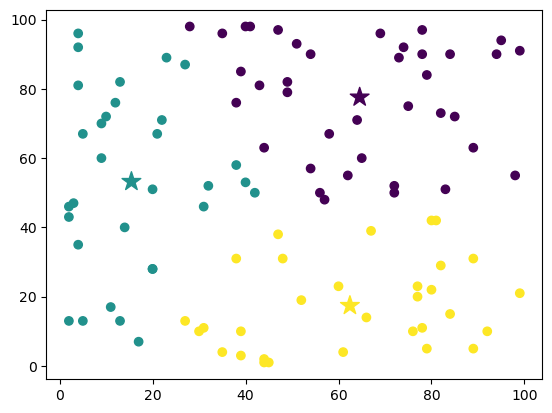

In [12]:
# Create a scatter plot of the random_points dataset with color-coded points based on cluster assignments
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)

# Overlay the centroids on the scatter plot with a different marker and color
# Centroids are marked with '*' and color-coded based on their indices
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker='*', s=200)

# Display the plot
plt.show()
